In [125]:
import pandas as pd
import numpy as np

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')

In [126]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [127]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [128]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [129]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2021)

## 모델적합
## OLS: 가장 기본적인 결정론적 선형 회귀 방법
## 잔차 제곱합(RSS)을 최소화하는 가중치를 구한다.

## 모델 선언: model = sm.OLS(Y데이터, X데이터)

In [131]:
X_train = sm.add_constant(X_train) # B0를 구성
model = sm.OLS(y_train, X_train)
model_trained = model.fit()

In [132]:
X_train.head() # 1로 구성된 벡터 const가 추가된 것을 확인

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
28,1.0,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80
498,1.0,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92
284,1.0,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285.0,15.3,394.72,7.85
414,1.0,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98
123,1.0,0.15038,0.0,25.65,0,0.581,5.856,97.0,1.9444,2,188.0,19.1,370.31,25.41


## 확률오차 가정
## 잔차는 $\varepsilon_i\sim N(0, \sigma^2)$

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


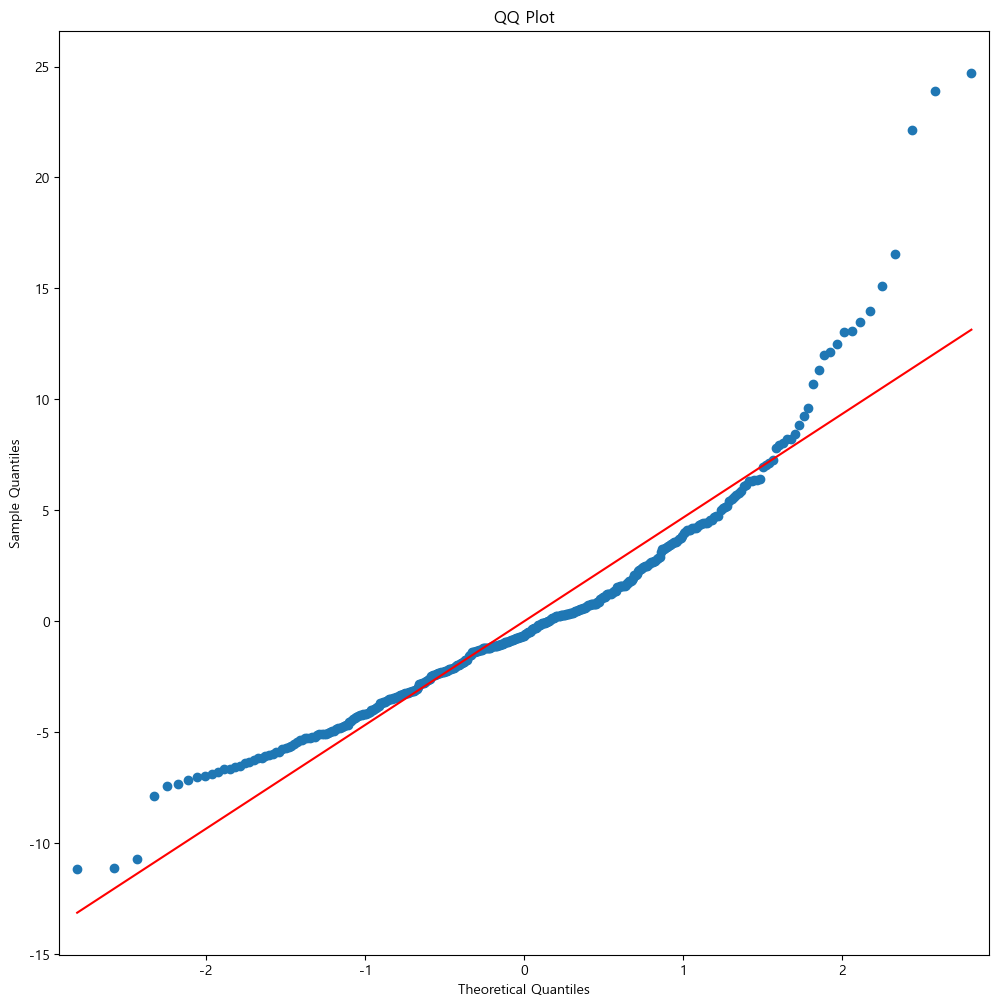

In [133]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='red', ax=ax)
ax.title.set_text('QQ Plot')

## 등분산성 확인

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

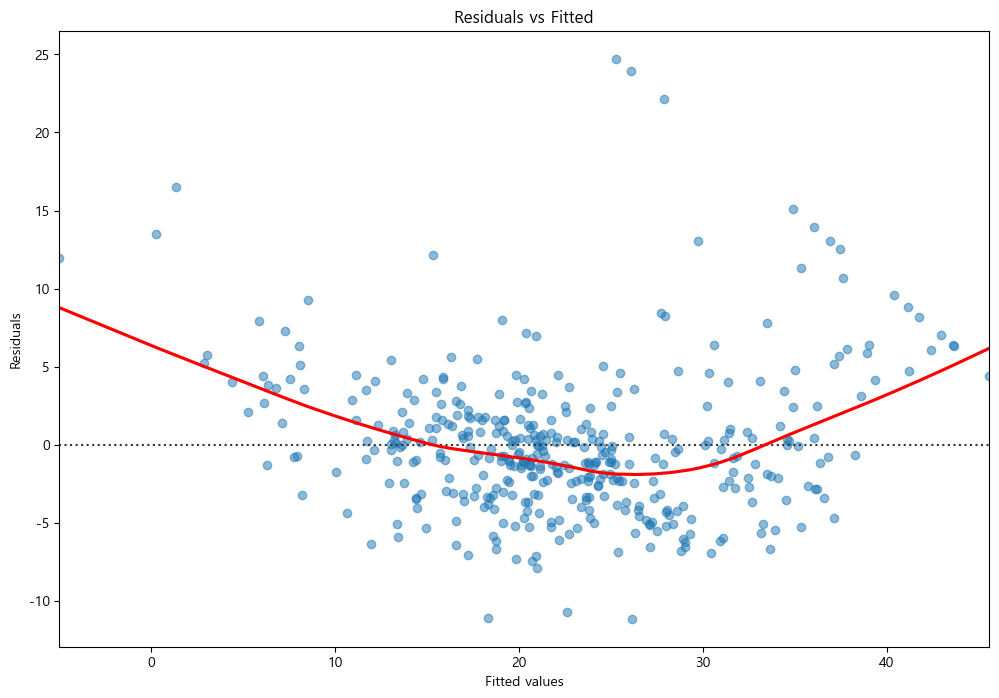

In [134]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(x=model_fitted_y, y=y_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

## 통계적으로 설명하기
### R-squared : 결정계수, 모형의 성능
### coef : X가 한 단위 증가할 때 Y의 변화량

In [135]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          1.02e-110
Time:                        01:12:16   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

### P-val이 높았던 INDUS, AGE를 제거한 후 모델을 구축

In [136]:
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          1.19e-112
Time:                        01:12:16   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

## 예측 : 미래의 반응변수 값 예측하기

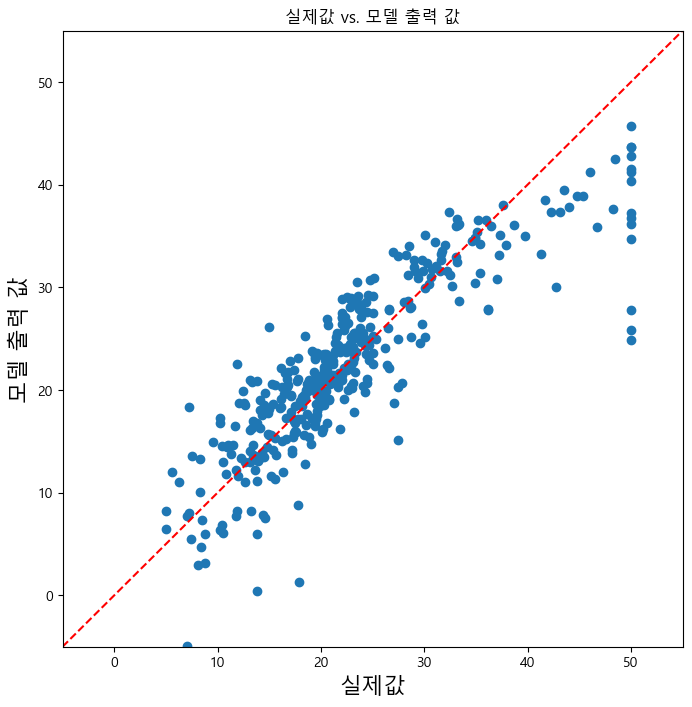

In [137]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [138]:
X_test = sm.add_constant(X_test)

In [139]:
y_test_pred = model_trained.predict(X_test.drop(['INDUS', 'AGE'], axis=1))
y_test_pred.head()

210    22.787949
24     15.482380
36     22.346630
439    13.433993
161    36.890921
dtype: float64

## 여러 측도

In [140]:
print(mean_squared_error(y_test, y_test_pred))

23.063158240353868


In [141]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

4.802411710833825


In [142]:
print(mean_absolute_error(y_test, y_test_pred))

3.512302350895129


In [143]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
print(mean_absolute_error(y_test, pd.DataFrame(y_test_pred)))

3.512302350895129


## 결정 계수
### $R^2$은 0과 1사이에 존재한다.
### $R^2 = 1$ 이라면 현재 가지고 있는 X변수로 Y를 100% 설명, 따라서 모든 관측치가 회귀직선 위에 있다.
### 사용하고 있는 X변수가 Y변수의 분산을 얼마나 줄였는지 정도.
### 단순히 Y의 평균값을 사용했을 때 대비 X 정보를 사용함으로써 얻는 성능향상 정도
### -> $\frac{SSR}{SST}$
### 사용하고 있는 X변수의 품질 등.

In [144]:
print(r2_score(y_test, y_test_pred))

0.6389403215499558


## 최종 결과 정리

In [145]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 21.881
Training RMSE: 4.678
Training MAE: 3.315
Training MAPE: 17.076
Training R2: 0.756


In [146]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 23.063
Testing RMSE: 4.802
Testing MAE: 3.512
Testing MAPE: 17.387
Testing R2: 0.639


## Statmodels VS Sklearn
###
### Statsmodels : 통계 분석 도구  
### 다양한 옵션이 없지만 Stata, R 등에 대해 검증된 도구를 제공
### 다양한 선형 회귀 모델, 혼합 선형 모델, 회귀 분석이 필요한 경우 불연속 종속 변수에 대한 옵션 풍부함
### R과 언어 형식이 비슷함
###
### Sklearn : 데이터 분석 도구
### 개발 속도, 유저 사용량 多
### 분류, 회귀 또는 클러스터링 알고리즘과 관련하여 간단하고 배우기 쉬운 알고리즘을 제공
### 다양한 평가 지표 제공

In [147]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [148]:
lr_skl = LinearRegression(fit_intercept=False) # default가 fit_intercept=True
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(y_train,X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

### Statmodels

In [149]:
test_mse_stat = mean_squared_error(y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(y_test, pd.DataFrame(y_pred_stat))
test_r2_stat = r2_score(y_test, y_pred_stat)

print('Testing MSE: {:.3f}'.format(test_mse_stat))
print('Testing RMSE: {:.3f}'.format(test_rmse_stat))
print('Testing MAE: {:.3f}'.format(test_mae_stat))
print('Testing MAPE: {:.3f}'.format(test_mape_stat))
print('Testing R2: {:.3f}'.format(test_r2_stat))

Testing MSE: 23.300
Testing RMSE: 4.827
Testing MAE: 3.519
Testing MAPE: 43.914
Testing R2: 0.635


### Sklearn

In [150]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing MAPE: {:.3f}'.format(test_mape_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

Testing MSE: 23.300
Testing RMSE: 4.827
Testing MAE: 3.519
Testing MAPE: 17.366
Testing R2: 0.635


In [151]:
np.array(y_pred_stat).shape

(102,)

In [152]:
np.array(y_pred_skl).shape

(102,)